In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merge = pd.merge(mouse_metadata,study_results,how="outer",on='Mouse ID')

# Display the data table for preview

data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Observations and Insights
# Checking the number of mice

num_mice = len(data_merge['Mouse ID'].unique())
num_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mice = data_merge.loc[data_merge.duplicated(subset = ['Mouse ID','Timepoint'],keep = False) == True]
duplicate_mice = pd.DataFrame(duplicate_mice)
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

mice_data = data_merge.set_index('Mouse ID')
dups = mice_data.loc['g989',:]
mice_clean = mice_data.drop(index = 'g989')
duplicate_mice_clean = mice_clean.reset_index()
duplicate_mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Observations and Insights
# Checking the number of mice in the clean DataFrame

clean_mice = len(duplicate_mice_clean['Mouse ID'].unique())
clean_mice

248

In [8]:
# Summary Stats
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Convert the Series into a DataFrame

# Create a Series of the mean tumor volume by Drug Regimen 

mean_volume = [data_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()]

mean_volume_df = pd.DataFrame(mean_volume)
mean_volume_df = mean_volume_df.transpose()
mean_volume_df = mean_volume_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
mean_volume_df


,Mean Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [9]:
# Create a Series of the median tumor volume by Drug Regimen

median_volume = [data_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()]

median_volume_df = pd.DataFrame(median_volume)
median_volume_df = median_volume_df.transpose()
median_volume_df = median_volume_df.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume (mm3)'})
median_volume_df

,Median Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [10]:
# Create a Series of the variance tumor volume by Drug Regimen 

variance_volume = [data_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()]

variance_volume_df = pd.DataFrame(variance_volume)
variance_volume_df = variance_volume_df.transpose()
variance_volume_df = variance_volume_df.rename(columns={'Tumor Volume (mm3)': 'Variance Tumor Volume (mm3)'})
variance_volume_df

,Variance Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [11]:
# Create a Series of the Standard Deviation tumor volume by Drug Regimen 

std_dev_volume = [data_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()]

std_dev_volume_df = pd.DataFrame(std_dev_volume)
std_dev_volume_df = std_dev_volume_df.transpose()
std_dev_volume_df = std_dev_volume_df.rename(columns={'Tumor Volume (mm3)': 'STD DEV Tumor Volume (mm3)'})
std_dev_volume_df

,STD DEV Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [12]:
# Create a Series of the SEM tumor volume by Drug Regimen 

sem_volume = [data_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()]

sem_volume_df = pd.DataFrame(sem_volume)
sem_volume_df = sem_volume_df.transpose()
sem_volume_df = sem_volume_df.rename(columns={'Tumor Volume (mm3)': 'SEM of Tumor Volume (mm3)'})
sem_volume_df

,SEM of Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [13]:
# Summary Stats
# Volume Summary Table

volume_sum_1 = pd.merge(mean_volume_df,median_volume_df,how="outer",on='Drug Regimen')
volume_sum_1

volume_sum_2 = pd.merge(variance_volume_df,std_dev_volume_df,how="outer",on='Drug Regimen')
volume_sum_2

volume_sum_3 = pd.merge(volume_sum_1,volume_sum_2,how="outer",on='Drug Regimen')
volume_sum_3

final_volume = pd.merge(volume_sum_3, sem_volume_df,how="outer",on='Drug Regimen')
final_volume

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),STD DEV Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


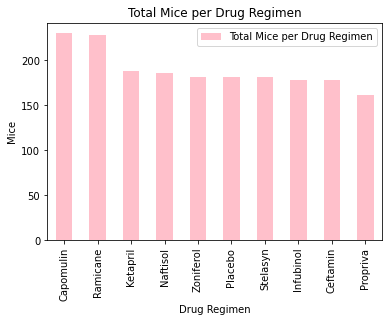

In [14]:
# Bar and Pie Charts
# Generate a bar plot showing the total number of mice for each treatment (Drug Regimen) using pandas

plt.title("Total Mice per Drug Regimen")
plt.ylabel("Mice")
plt.xlabel("Drug Regimen")
mouse_count = data_merge['Drug Regimen'].value_counts()

mouse_count.plot(kind= "bar",x= "Drug Regimen", y= "Value Counts",label= "Total Mice per Drug Regimen", color= "pink")
plt.legend()
plt.show()

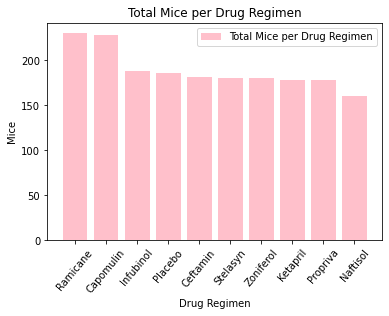

In [15]:
# Generate a bar plot showing the total number of mice for each treatment using pyplot

mouse_plt = data_merge['Drug Regimen'].unique()
mouse_plt

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.bar(mouse_plt, height= (mouse_count), label= "Total Mice per Drug Regimen", color= "pink")
plt.xticks(rotation= 50)
plt.legend()
plt.show()

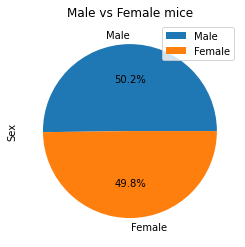

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_vs_female = data_merge.drop_duplicates(subset= ['Mouse ID'])
male_vs_female = male_vs_female['Sex'].value_counts()
plt.title("Male vs Female mice")
male_vs_female.plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

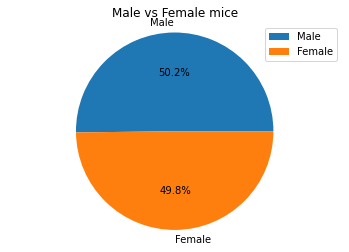

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Male','Female'
sizes = male_vs_female

fig1, ax1 = plt.subplots()
plt.title("Male vs Female mice")
ax1.pie(sizes, labels= labels, autopct= '%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()

In [18]:
# Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

four_regimens = duplicate_mice_clean.sort_values(by ='Timepoint', ascending= False)
four_regimens_df = four_regimens.drop_duplicates(subset= ['Mouse ID'])
regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

four_regimens_df = four_regimens_df.loc[(four_regimens_df['Drug Regimen'].isin(regimens))]
four_regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1842,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1366,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1730,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1570,u153,Ceftamin,Female,11,25,0,45.000000,0


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_data = []
drugs = four_regimens_df['Drug Regimen'].unique().tolist()

for i, regimen in enumerate(regimens):
    outliers_df = four_regimens_df.loc[(four_regimens_df['Drug Regimen'] == regimen)]
    tumor_data.append(outliers_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']])
    lowerq = outliers_df['Tumor Volume (mm3)'].quantile(0.25)
    upperq = outliers_df['Tumor Volume (mm3)'].quantile(0.75)
    
    IQR = upperq - lowerq
    lower_bound = round(lowerq - (1.5 * IQR),4)
    upper_bound = round(upperq + (1.5 * IQR),4)
    
# Print Results
    print(f"{regimen} IQR data is:")
    print(f"The lower quartile of {regimen} is: {lower_bound}")
    print(f"The upper quartile of {regimen} is: {upper_bound}")
    print(f"The interquartile range of {regimen} is: {IQR}")
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")

Capomulin IQR data is:
The lower quartile of Capomulin is: 20.7046
The upper quartile of Capomulin is: 51.832
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.7046 for Capomulin could be outliers.
Values above 51.832 for Capomulin could be outliers.
Ramicane IQR data is:
The lower quartile of Ramicane is: 17.9127
The upper quartile of Ramicane is: 54.3068
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.9127 for Ramicane could be outliers.
Values above 54.3068 for Ramicane could be outliers.
Infubinol IQR data is:
The lower quartile of Infubinol is: 36.8329
The upper quartile of Infubinol is: 82.7414
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.8329 for Infubinol could be outliers.
Values above 82.7414 for Infubinol could be outliers.
Ceftamin IQR data is:
The lower quartile of Ceftamin is: 25.3554
The upper quartile of Ceftamin is: 87.6665
The interquartile range of Ceftamin is: 15.577752179999997
Values

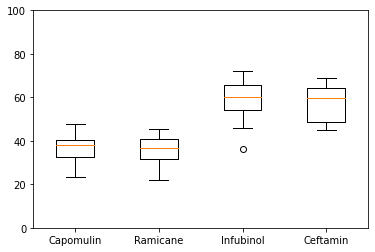

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [20]:
# Locate the rows which contain mice on each drug and get the tumor volumes
four_regimens_sort = four_regimens_df.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']
four_regimens_df = four_regimens_sort.to_frame()
four_regimens_df

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_df = four_regimens_df.reset_index()
tumor_vol_list = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_vol_list_df = pd.DataFrame(tumor_vol_list)
tumor_vol_list_df = tumor_vol_list_df.reindex(regimens)
tumor_volume_loop = [vol for vol in tumor_vol_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume_loop, labels = regimens)
plt.ylim(0,100)
plt.show()
plt.tight_layout

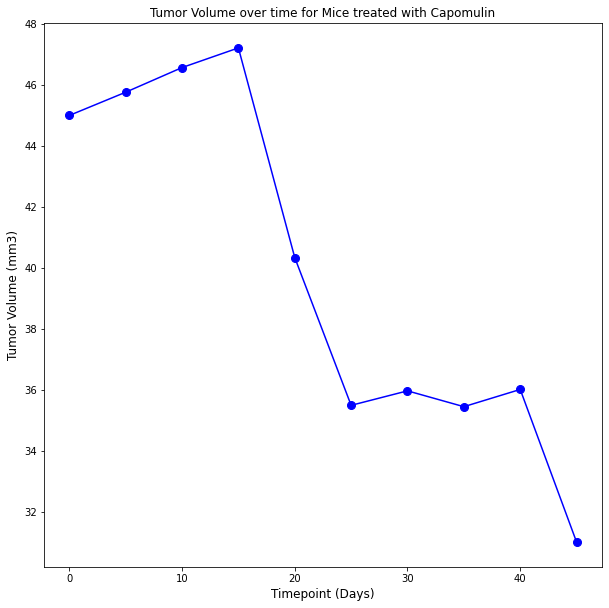

In [21]:
# Line and Scatter Plots
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capline = duplicate_mice_clean.loc[duplicate_mice_clean['Mouse ID'] == "u364"]
x_axis = capline['Timepoint']
y_axis = capline['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Tumor Volume over time for Mice treated with Capomulin',fontsize= 12)
plt.plot(x_axis, y_axis, markersize= 8, marker= "o",color= "b")
plt.xlabel('Timepoint (Days)',fontsize= 12)
plt.ylabel('Tumor Volume (mm3)',fontsize= 12)
plt.show()

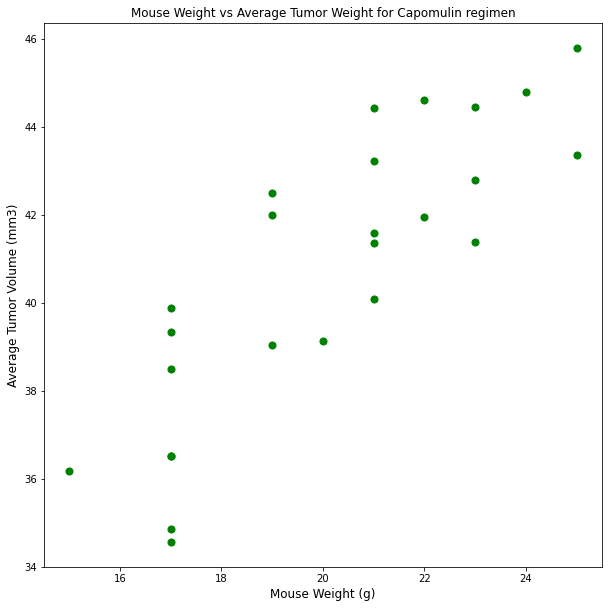

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = (duplicate_mice_clean.loc[duplicate_mice_clean['Drug Regimen'] == "Capomulin"]).groupby(['Mouse ID'])
weight = capomulin_df['Weight (g)'].mean()

average_tumor_volume = capomulin_df['Tumor Volume (mm3)'].mean()

fig1, ax1 = plt.subplots(figsize= (10, 10))
plt.title("Mouse Weight vs Average Tumor Weight for Capomulin regimen",fontsize= 12)
plt.scatter(weight, average_tumor_volume, s= 50,color= "g")
plt.xlabel('Mouse Weight (g)',fontsize= 12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize= 12)
plt.show()

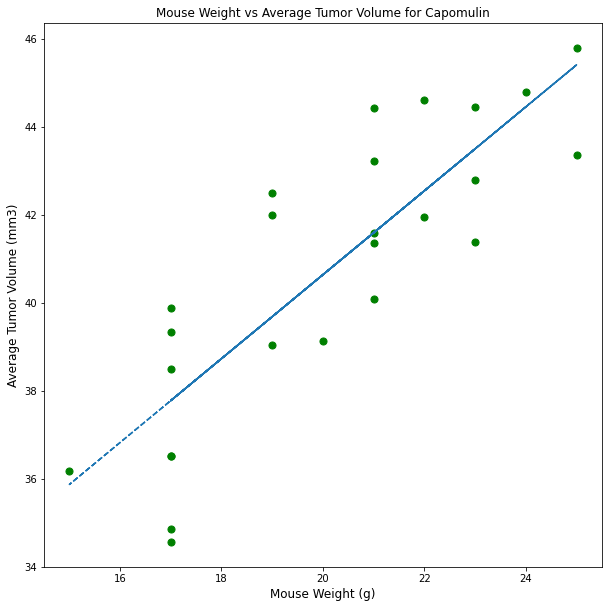

The line equation is y = 0.95x + 21.55.
The correlation coefficient is 0.8419363424694718.
The coefficient of determination (r-squared) is 0.7088568047708717.


In [26]:
# Correlation and Regression
# Calculate the correlation coefficient and linear regression model 

# Perform a linear regression on mouse weight versus average tumor volume for the Capomulin regimen
capomulin_slope, capomulin_int, capomulin_r, capomulin_p, capomulin_std_error = st.linregress(weight, average_tumor_volume)

# Create equation of line to calculate predicted average tumor volume
capomulin_fit = capomulin_slope * weight + capomulin_int
fig1, ax1 = plt.subplots(figsize= (10, 10))
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin",fontsize= 12)
line_eq = "y = " + str(round(capomulin_slope,2)) + "x + " + str(round(capomulin_int,2))
plt.scatter(weight, average_tumor_volume, s= 50,color= "g")
plt.plot(weight, capomulin_fit, "--")
plt.xlabel('Mouse Weight (g)',fontsize= 12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize= 12)
plt.show()
print(f"The line equation is {line_eq}.")
print(f"The correlation coefficient is {capomulin_r}.")
print(f"The coefficient of determination (r-squared) is {capomulin_r**2}.")

In [ ]:
## Observations and Insights
# The two regimens shown most effective are Capomulin and Ramicane.
# The Tumor Volume quartiles are much lower when treated with Capomilin and Ramicane in comparison to Infubinol and Ceftamin.
# Capomulin proved the most effective in significantly reducing tumore size over the study period.
# Mice weight is positively correlated with tumor size.
# It may be possible lower mouse weights respond more positively with treatment, in particular Capomulin. 